# Model Data

Place where the magic happens

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import random



import statsmodels.api as sm
from statsmodels.formula.api import ols

# I want to see all information
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [72]:
# read information from csv file
df = pd.read_csv("explore_kc_house_data.csv") 
df.shape

(16733, 19)

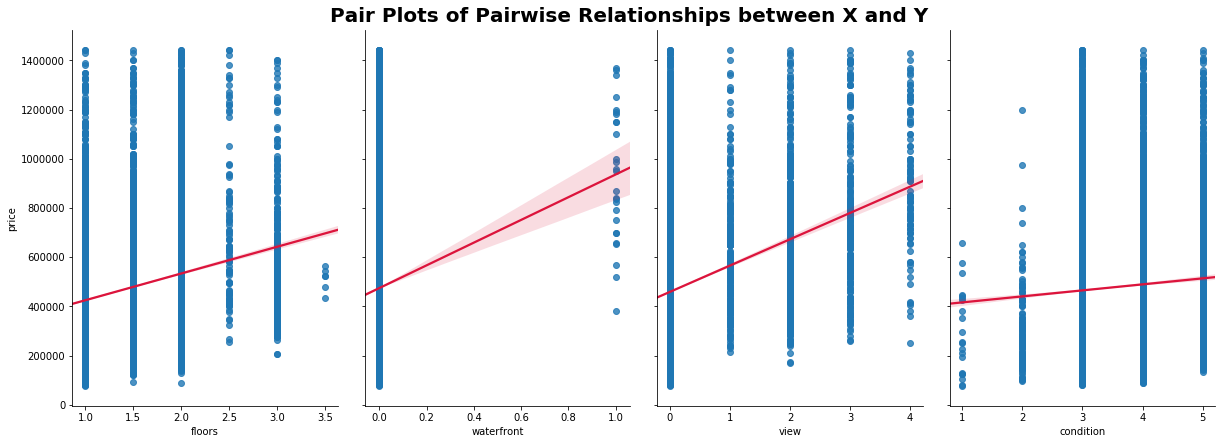

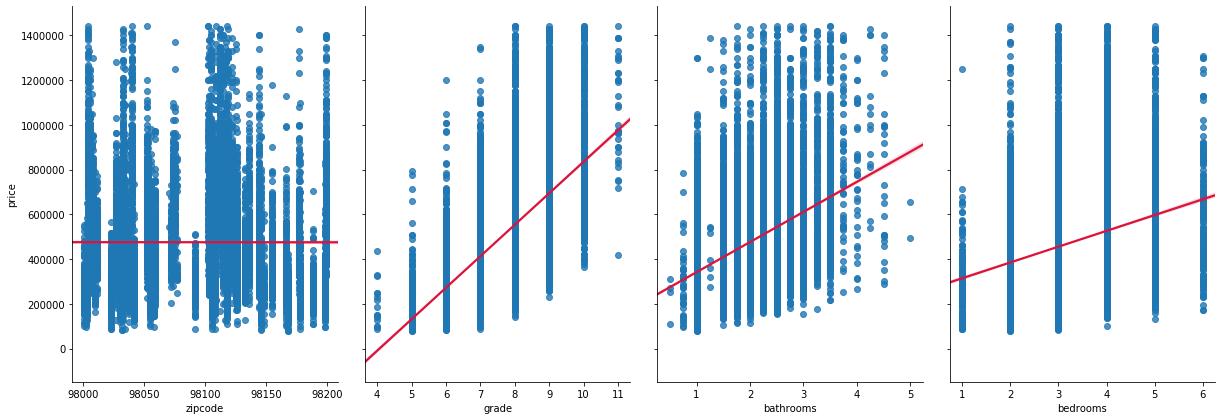

In [77]:
# visualize the pairwise relationship between the features and the response using pairplots (seaborn scatterplots)
#Floors, waterfront, view, condition, zipcode, and grade - look like a categorical data
#Bathrooms and bedrooms would also be categorical, but have some outlier

sns.pairplot(x_vars=['floors', 'waterfront', 'view', 'condition'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Pairwise Relationships between X and Y', size=20, weight='bold', y=1.02)

sns.pairplot(x_vars=['zipcode', 'grade', 'bathrooms', 'bedrooms'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)
plt.show();

Text(0.5, 1.02, 'Pair Plots of Pairwise Relationships between X and Y')

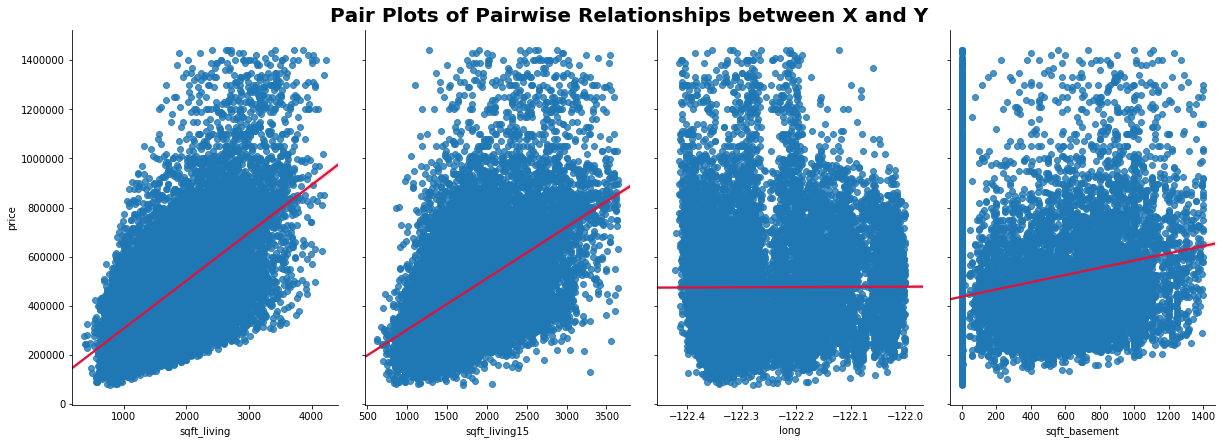

In [79]:
#Price, bedrooms, sqft_living, sqft_above, sqft_living15, view, long, sqft_basement

sns.pairplot(x_vars=['sqft_living',  'sqft_living15', 'long','sqft_basement'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Pairwise Relationships between X and Y', size=20, weight='bold', y=1.02)



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16733 entries, 0 to 16732
Data columns (total 19 columns):
price            16733 non-null float64
bedrooms         16733 non-null int64
bathrooms        16733 non-null float64
sqft_living      16733 non-null int64
sqft_lot         16733 non-null int64
floors           16733 non-null float64
waterfront       16733 non-null int64
view             16733 non-null int64
condition        16733 non-null int64
grade            16733 non-null int64
sqft_basement    16733 non-null int64
yr_built         16733 non-null int64
yr_renovated     16733 non-null int64
zipcode          16733 non-null int64
lat              16733 non-null float64
long             16733 non-null float64
sqft_living15    16733 non-null int64
year             16733 non-null int64
day              16733 non-null int64
dtypes: float64(5), int64(14)
memory usage: 2.4 MB


In [13]:
x = df.drop(['price'], axis=1)
y = df['price']
linereg = sm.OLS(y, x)
results= linereg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          1.535e+04
Date:                Thu, 05 Mar 2020   Prob (F-statistic):                        0.00
Time:                        04:48:37   Log-Likelihood:                     -2.2021e+05
No. Observations:               16733   AIC:                                  4.405e+05
Df Residuals:                   16715   BIC:                                  4.406e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -1.378e+04   1502.702     -9.171      0.000   -1.67e+04   -1.08e+04
bathrooms      2.108e+04   2434.664      8.657      0.000    1.63e+04    2.59e+04
sqft_living     106.6214      3.251     32.799      0.000     100.250     112.993
sqft_lot         -6.3403      0.359    -17.640      0.000      -7.045      -5.636
floors         2.028e+04   2860.376      7.091      0.000    1.47e+04    2.59e+04
waterfront     2.737e+05   2.51e+04     10.896      0.000    2.24e+05    3.23e+05
view           4.301e+04   1774.689     24.233      0.000    3.95e+04    4.65e+04
condition      2.645e+04   1637.607     16.151      0.000    2.32e+04    2.97e+04
grade          8.629e+04   1638.647     52.661      0.000    8.31e+04    8.95e+04
sqft_basement    -8.5902      3.636     -2.363      0.018     -15.717      -1.464
yr_built      -2246.3159     50.020    -44.908      0.000   -2344.361   -2148.271
yr_renovated     19.1384      2.955      6.476      0.000      13.346      24.931
zipcode        -419.0186     22.694    -18.464      0.000    -463.501    -374.537
lat            5.848e+05   7951.705     73.539      0.000    5.69e+05       6e+05
long          -4.962e+04   1.26e+04     -3.933      0.000   -7.43e+04   -2.49e+04
sqft_living15    44.1416      2.904     15.202      0.000      38.450      49.833
year           5518.3584    941.940      5.859      0.000    3672.056    7364.661
day            -519.7999    666.918     -0.779      0.436   -1827.030     787.430
==============================================================================
Omnibus:                     3160.400   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9738.696
Skew:                           0.975   Prob(JB):                         0.00
Kurtosis:                       6.188   Cond. No.                     2.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

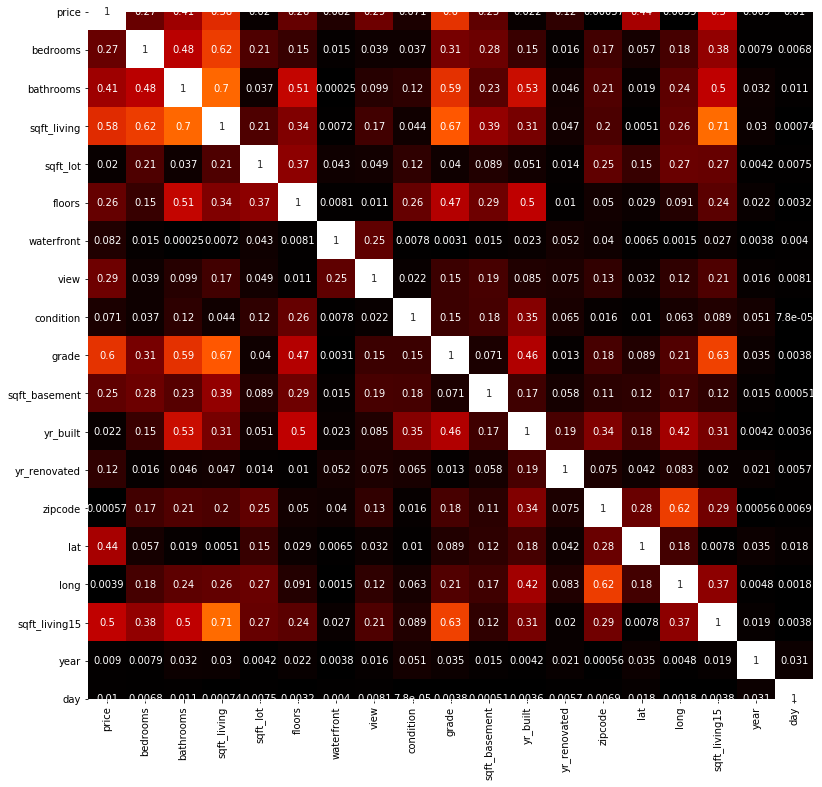

In [23]:
plt.figure(figsize=(13,15))
sns.heatmap(df.corr().abs(), annot=True, cmap='gist_heat', linecolor='Red', cbar=False, square=True)
plt.show()

In [44]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.598810
sqft_living      0.584675
sqft_living15    0.501147
lat              0.435306
bathrooms        0.412425
view             0.287009
bedrooms         0.269680
floors           0.264383
sqft_basement    0.247555
yr_renovated     0.121934
waterfront       0.082390
condition        0.071273
year             0.008967
long             0.003882
zipcode         -0.000568
day             -0.010276
sqft_lot        -0.020216
yr_built        -0.022023
Name: price, dtype: float64

In [52]:
grade_dummies = pd.get_dummies(df['grade'], prefix = 'grade', drop_first = True)
bathrooms_dummies = pd.get_dummies(df['bathrooms'], prefix = 'bath', drop_first = True)
view_dummies = pd.get_dummies(df['view'], prefix = 'view', drop_first = True)
bedrooms_dummies = pd.get_dummies(df['bedrooms'], prefix = 'bed', drop_first = True)
floors_dummies = pd.get_dummies(df['floors'], prefix = 'floor', drop_first = True)
yr_renovated_dummies = pd.get_dummies(df['yr_renovated'], prefix = 'reno', drop_first = True)
waterfront_dummies = pd.get_dummies(df['waterfront'], prefix = 'water', drop_first = True)
condition_dummies = pd.get_dummies(df['condition'], prefix = 'cond', drop_first = True)
#zipcode_dummies = pd.get_dummies(df['zipcode'], prefix = 'zip', drop_first = True)


In [53]:
df = df.drop(['bedrooms', 'bathrooms', 'floors', 'view', 'waterfront', 'condition', 'yr_renovated', 'zipcode', 'grade'], axis = 1)

In [54]:
df = pd.concat([df, bedrooms_dummies, bathrooms_dummies, floors_dummies, view_dummies, waterfront_dummies, condition_dummies, yr_renovated_dummies, grade_dummies], axis = 1)

In [55]:
print(df.columns)
print(df.shape)
df

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living15', 'year', 'day',
       ...
       'reno_2013', 'reno_2014', 'reno_2015', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11'],
      dtype='object', length=119)
(16733, 119)


,price,sqft_living,sqft_lot,sqft_basement,yr_built,lat,long,sqft_living15,year,day,bed_2,bed_3,bed_4,bed_5,bed_6,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,bath_3.75,bath_4.0,bath_4.25,bath_4.5,bath_5.0,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5,view_1,view_2,view_3,view_4,water_1,cond_2,cond_3,cond_4,cond_5,reno_1934,reno_1940,reno_1944,reno_1945,reno_1946,reno_1948,reno_1953,reno_1955,reno_1956,reno_1957,reno_1958,reno_1959,reno_1960,reno_1962,reno_1963,reno_1964,reno_1965,reno_1967,reno_1968,reno_1969,reno_1970,reno_1971,reno_1972,reno_1973,reno_1974,reno_1975,reno_1976,reno_1977,reno_1978,reno_1979,reno_1980,reno_1981,reno_1982,reno_1983,reno_1984,reno_1985,reno_1986,reno_1987,reno_1988,reno_1989,reno_1990,reno_1991,reno_1992,reno_1993,reno_1994,reno_1995,reno_1996,reno_1997,reno_1998,reno_1999,reno_2000,reno_2001,reno_2002,reno_2003,reno_2004,reno_2005,reno_2006,reno_2007,reno_2008,reno_2009,reno_2010,reno_2011,reno_2012,reno_2013,reno_2014,reno_2015,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,221900.0,1180,5650,0,1955,47.5112,-122.257,1340,2014,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,538000.0,2570,7242,400,1951,47.7210,-122.319,1690,2014,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,180000.0,770,10000,0,1933,47.7379,-122.233,2720,2015,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,604000.0,1960,5000,910,1965,47.5208,-122.393,1360,2014,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,510000.0,1680,8080,0,1987,47.6168,-122.045,1800,2015,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16728,360000.0,1530,1131,0,2009,47.6993,-122.346,1530,2014,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16729,400000.0,2310,5813,0,2014,47.5107,-122.362,1830,2015,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16730,402101.0,1020,1350,0,2009,47.5944,-122.299,1020,2014,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16731,400000.0,1600,2388,0,2004,47.5345,-122.069,1410,2015,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [59]:
data_ols1 = pd.concat([df['price'], grade_dummies, df['sqft_living']], axis = 1)
data_ols1.head()

,price,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,sqft_living
0,221900.0,0,0,1,0,0,0,0,1180
1,538000.0,0,0,1,0,0,0,0,2570
2,180000.0,0,1,0,0,0,0,0,770
3,604000.0,0,0,1,0,0,0,0,1960
4,510000.0,0,0,0,1,0,0,0,1680


In [60]:
outcome = 'price'
predictors = data_ols1.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [62]:
model = ols(formula=formula, data=data_ols1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1566.
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        05:13:04   Log-Likelihood:            -2.2526e+05
No. Observations:               16733   AIC:                         4.505e+05
Df Residuals:                   16724   BIC:                         4.506e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.331e+05   4.25e+04      3.130      0.002    4.97e+04    2.16e+05
grade_5      4714.7826   4.44e+04      0.106      0.915   -8.22e+04    9.17e+04
grade_6      4.188e+04   4.27e+04      0.980      0.327   -4.18e+04    1.26e+05
grade_7      8.999e+04   4.26e+04      2.111      0.035    6438.456    1.74e+05
grade_8      1.756e+05   4.27e+04      4.107      0.000    9.18e+04    2.59e+05
grade_9      3.031e+05    4.3e+04      7.042      0.000    2.19e+05    3.87e+05
grade_10     4.142e+05   4.38e+04      9.467      0.000    3.28e+05       5e+05
grade_11      5.52e+05   5.18e+04     10.656      0.000     4.5e+05    6.53e+05
sqft_living   109.0141      2.639     41.315      0.000     103.842     114.186
==============================================================================
Omnibus:                     2105.611   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3704.454
Skew:                           0.842   Prob(JB):                         0.00
Kurtosis:                       4.574   Cond. No.                     1.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


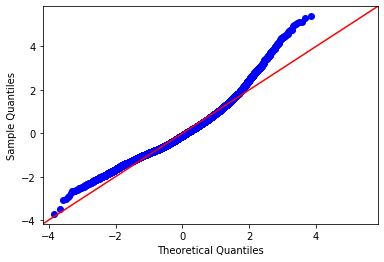

In [63]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [67]:
data_ols2 = pd.concat([df['price'], waterfront_dummies, df['sqft_living']], axis = 1)

In [69]:
data_ols2.rename(columns = {'water_1.0': 'water_1'}, inplace = True)

outcome = 'price'
predictors = data_ols2.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [70]:
model = ols(formula=formula, data=data_ols6).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     4464.
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        05:16:22   Log-Likelihood:            -2.2636e+05
No. Observations:               16733   AIC:                         4.527e+05
Df Residuals:                   16730   BIC:                         4.528e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.117e+05   4128.558     27.067      0.000    1.04e+05     1.2e+05
water_1      4.376e+05    3.5e+04     12.519      0.000    3.69e+05    5.06e+05
sqft_living   194.8246      2.082     93.560      0.000     190.743     198.906
==============================================================================
Omnibus:                     1974.992   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3233.847
Skew:                           0.828   Prob(JB):                         0.00
Kurtosis:                       4.378   Cond. No.                     4.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""